<a href="https://colab.research.google.com/github/SubratBihari/Data-Science-Projects/blob/master/movielens_100k_exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

**u.user     --** Demographic information about the users; this is a tab  separated list of

 `*user id | age | gender | occupation | zip code*`

The user ids are the ones used in the u.data data set

In [2]:
cols = ['Userid','Age','Gender','Occupation','Zip code']
user = pd.read_csv('/content/u.user', names=cols, sep='|')
user.head()

,Userid,Age,Gender,Occupation,Zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
user.isna().apply(pd.value_counts) #missing value check

,Userid,Age,Gender,Occupation,Zip code
False,943,943,943,943,943


In [4]:
user.isnull().sum()

Userid        0
Age           0
Gender        0
Occupation    0
Zip code      0
dtype: int64

**u.data     --** The full u data set, 100000 ratings by 943 users on 1682 items.
Each user has rated at least 20 movies.  Users and items are numbered consecutively from 1.  The data is randomly ordered. This is a tab separated list of 

	         *user id | item id | rating | timestamp*. 
The time stamps are *unix seconds since 1/1/1970* UTC   

In [5]:
#read u.data file from the folder and name the columns after referring to the Readme file in the same folder
# , | \t 
ratings = pd.read_csv('/content/u.data', sep = '\t',names= ['UseID', 'ItemID', 'rating', 'unix_timestamp' ])
ratings.head()

,UseID,ItemID,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   UseID           100000 non-null  int64
 1   ItemID          100000 non-null  int64
 2   rating          100000 non-null  int64
 3   unix_timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
ratings.isna().apply(pd.value_counts)   #missing value check

,UseID,ItemID,rating,unix_timestamp
False,100000,100000,100000,100000


In [8]:
ratings.isnull().sum()

UseID             0
ItemID            0
rating            0
unix_timestamp    0
dtype: int64

**u.item     --** Information about the items (movies); this is a tab separated list of

`*movie id | movie title | release date | video release date |IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western *`
              
The last 19 fields are the genres, a 1 indicates the movie
is of that genre, a 0 indicates it is not; movies can be in several genres at once. The movie ids are the ones used in the u.data data set.

In [9]:
# Create a list of column names by copy pasting from the Readme file and read the u.item file by passing the list 'col_n'
col_n = ['movie id' , 'movie title' , 'release date' , 'video release date' ,
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western']


movies = pd.read_csv('/content/u.item', sep = '|',encoding = 'latin-1',names=col_n )
print(movies.shape)
movies.head()

(1682, 24)


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [11]:
# Dropping irrelevant columns
movies.drop(columns= ['video release date', 'IMDb URL'], inplace=True)  #drop unnecessary columns 

In [12]:
# looking at the counts of individual genres
l = []

for i in movies.loc[:,'unknown' : 'Western'].columns:
    b = movies[i].value_counts()[1]
    l.append(b)


#print(movies.loc[:,'unknown' : 'Western'].columns)
#print(l)

# Create a new Dataframe and assign the genre values 
genre_df = pd.DataFrame()
genre_df['Genre'] = movies.loc[:,'unknown' : 'Western'].columns
genre_df['Counts'] = l
genre_df

,Genre,Counts
0,unknown,2
1,Action,251
2,Adventure,135
3,Animation,42
4,Children's,122
5,Comedy,505
6,Crime,109
7,Documentary,50
8,Drama,725
9,Fantasy,22


In [13]:
#the unknown column has only 2 entries. let's look at them
movies[movies['unknown']== 1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1372,1373,Good Morning (1971),4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Since there is unknown column doesnt have a lot of info and the only movie associated with it was rated only once
movies.drop(movies[movies['unknown'] == 1].index, axis=0, inplace=True)
movies.drop(columns= 'unknown',inplace=True)

In [15]:
movies.isna().apply(pd.value_counts)  #missing value check

,movie id,movie title,release date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
False,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,...,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680


In [16]:
# adding extra column movies w.r.t release year
movies['release_year'] = movies['release date'].str.split('-', expand = True)[2]  #seperating out the year from the date
movies['release_year'] = movies.release_year.astype(int)  # changing the type to int

In [17]:
movies.isna().sum()   #missing value check

movie id        0
movie title     0
release date    0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
release_year    0
dtype: int64

In [18]:
user = pd.read_csv('/content/u.user', sep = '|', names= ['UserID',  'Age', 'Gender', 'Occupation','Zip-code'])
user.head()

,UserID,Age,Gender,Occupation,Zip-code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


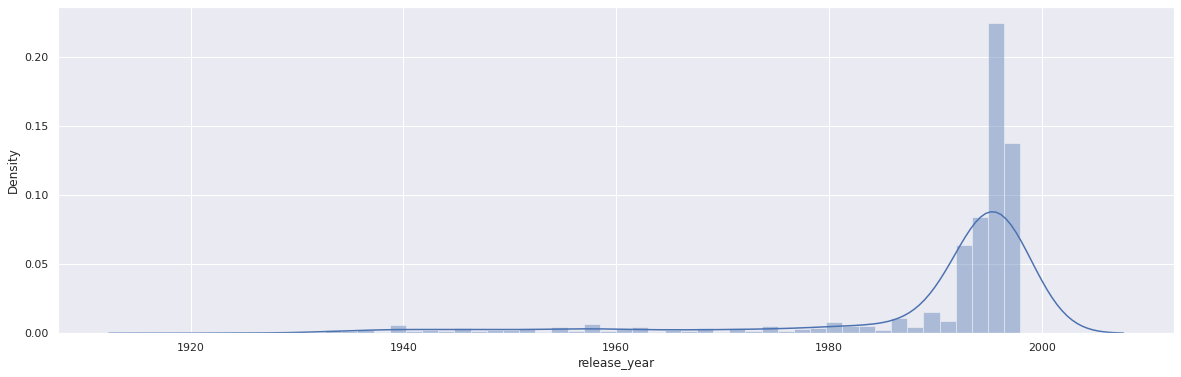

In [19]:
# Distribution of movies w.r.t release year
plt.figure(figsize=(20,6))    #increasing the figure size
sns.distplot(movies.release_year)
plt.show()

Univariate plots of columns: 'rating', 'Age', 'release date', 'Gender' and 'Occupation'

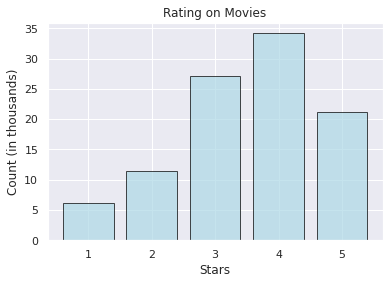

In [20]:
# Bar chart to view distribution of ratings accross all movies
x = ratings.rating.value_counts().index    #Values for x-axis
y = [ratings['rating'].value_counts()[i]/1000 for i in x]   #count(in thousands) on y-axis to plot in a neat manner 
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black', alpha = 0.7)  #plot a bar chart
plt.xlabel('Stars')
plt.ylabel('Count (in thousands)')
plt.title('Rating on Movies')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


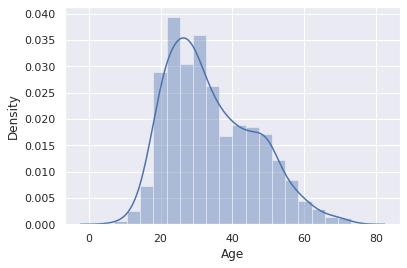

In [21]:
# Distribution of age 
sns.set()    #setting seaborn style to default
sns.distplot(user.Age)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


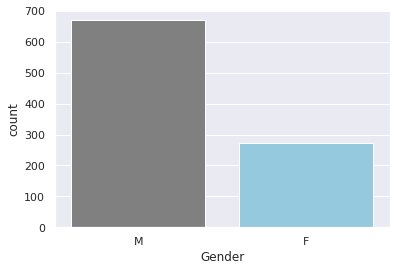

In [22]:
#Gender distribution

sns.countplot(user.Gender, palette=['gray','skyblue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


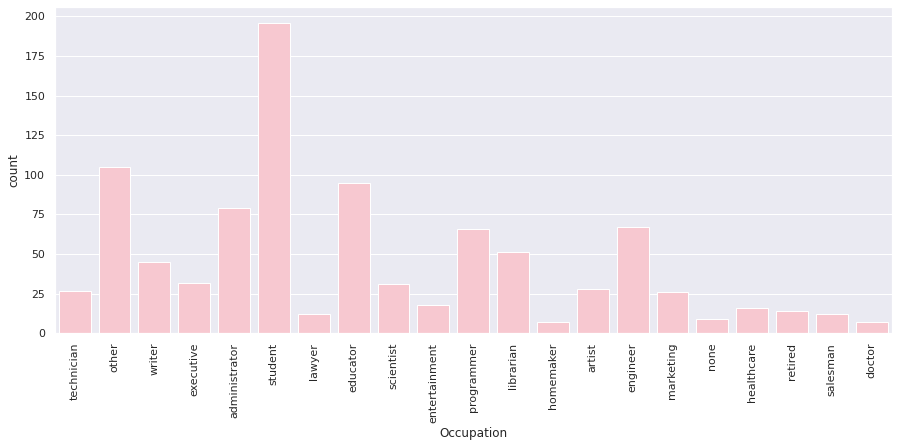

In [23]:
#Distribution of users w.r.t population

plt.figure(figsize=(15,6)) # Customizing to show the plot neatly

sns.countplot(user.Occupation, color= 'pink')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

Visualize how popularity of genres has changed over the years

In [24]:
genre_by_year = movies.groupby('release_year').sum()
genre_by_year = genre_by_year.drop(columns = 'movie id').T
genre_by_year

release_year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
Children's,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,3,6,4,1
Film-Noir,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,2,2


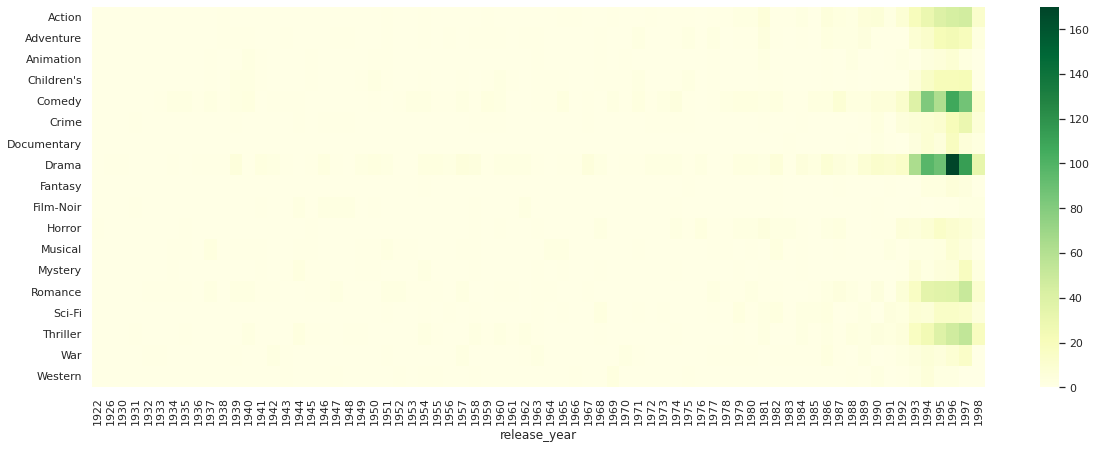

In [25]:
plt.figure(figsize=(20,7))  #setting the figure size
sns.heatmap(genre_by_year, cmap='YlGn')  #heat map to plot the above table
plt.show()

**Find the top 25 movies, each having a minimum of 100 ratings**

In [26]:
items = ratings.groupby('ItemID').count()
items.head()

,UseID,rating,unix_timestamp
ItemID,,,
1,452,452,452
2,131,131,131
3,90,90,90
4,209,209,209
5,86,86,86


In [27]:
items = ratings.groupby('ItemID').count()

items = items[ratings.groupby('ItemID').count().UseID > 100].index

items = ratings.loc[ratings.ItemID.isin(items)]

items = items.groupby('ItemID').mean()

items = items.sort_values('rating',ascending = False)

order = items.index

In [28]:
rating_list = items.rating[0:25]

In [29]:
movies.columns
items = movies.loc[movies['movie id'].isin(order)]

In [30]:
top_25_movies = items.set_index('movie id').loc[order]

top_25_movies = top_25_movies.iloc[0:25, 0]

In [31]:
top_25_movies = top_25_movies.reset_index()

In [32]:
top_25_movies['avg_rating'] =  rating_list.values

In [33]:
top_25_movies

,ItemID,movie title,avg_rating
0,408,"Close Shave, A (1995)",4.491071
1,318,Schindler's List (1993),4.466443
2,169,"Wrong Trousers, The (1993)",4.466102
3,483,Casablanca (1942),4.456790
4,64,"Shawshank Redemption, The (1994)",4.445230
5,603,Rear Window (1954),4.387560
6,12,"Usual Suspects, The (1995)",4.385768
7,50,Star Wars (1977),4.358491
8,178,12 Angry Men (1957),4.344000
9,134,Citizen Kane (1941),4.292929


**See gender distribution across different genres
Verify the following:**

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

In [34]:
movies.columns  # columns of movies dataframe

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'release_year'],
      dtype='object')

In [35]:
user.columns   #columns of users dataframe

Index(['UserID', 'Age', 'Gender', 'Occupation', 'Zip-code'], dtype='object')

In [36]:
ratings.columns  # columns of ratings dataframe

Index(['UseID', 'ItemID', 'rating', 'unix_timestamp'], dtype='object')

In [37]:
ratings.rename(columns= {'UseID' : 'UserID'}, inplace=True)  
#Renaming the column to have the same column name so that we can perform join operation

In [38]:
Data = pd.merge(ratings, user, how='inner', on='UserID')  #merging dataframes with UserID as the key

In [39]:
movies.rename(columns= {'movie id' : 'ItemID'}, inplace= True)
#Renaming the column to have the same column name so that we can perform join operation

In [40]:
Data = pd.merge(Data, movies, how='inner', on='ItemID')  # merging dataframes with ItemID as the key

In [41]:
Data.head()   

,UserID,ItemID,rating,unix_timestamp,Age,Gender,Occupation,Zip-code,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997


In [42]:
Genre_by_gender = Data.groupby('Gender').sum().loc[:,'Action':'Western']  #Group by gender and aggregate with sum and select all the genre columns 

In [43]:
Genre_by_gender['total'] = Genre_by_gender.sum(axis = 1)  #Row total of the dataframe

In [44]:
Genre_by_gender

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
Gender,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,53701
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,158884


**Let's try percentages**

In [45]:
Genre_by_gender.div(Genre_by_gender.total, axis= 0) * 100  #dividing each cell with row total and multiplying by 100

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
Gender,,,,,,,,,,,,,,,,,,,
F,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.47096,4.076274,0.690862,100.0
M,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,0.622467,0.848418,2.593087,2.210418,2.474132,8.561592,6.357468,10.56494,4.537272,0.933385,100.0
